In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

from matplotlib.cbook import boxplot_stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=10)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.2}'.format(x)
pd.set_option("display.max_rows", 10, "display.max_columns", 10)

In [14]:
chennai_2020 = pd.read_excel('ChennaiHousing.xlsm', 'Final_Data_2020')
chennai_2020.drop_duplicates(inplace=True)

In [15]:
chennai_2019 = pd.read_excel('ChennaiHousing.xlsm', 'Final_Data_2019')
chennai_2019.drop_duplicates(inplace=True)

In [16]:
chennai_2020.dtypes

City                           object
Area                           object
PricePerSqft_2020               int64
PricePerSqft_Adjusted_2020    float64
dtype: object

In [17]:
chennai_2020.groupby(by='Area').count()

,City,PricePerSqft_2020,PricePerSqft_Adjusted_2020
Area,,,
Adyar,59,59,59
Anna Nagar,98,98,98
Chromepet,73,73,73
KK Nagar,13,13,13
Karapakkam,59,59,59
T Nagar,66,66,66
Velachery,71,71,71


In [18]:
chennai_2019.dtypes

City                  object
Area                  object
PricePerSqft_2019    float64
dtype: object

In [19]:
chennai_2020.drop(['City', 'PricePerSqft_Adjusted_2020'], axis=1, inplace=True)
chennai_2019.drop('City', axis=1, inplace=True)

In [20]:
chennai_2020.groupby(by='Area').describe()

PricePerSqft_2020                                               \
                       count    mean     std  min     25%     50%     75%   
Area                                                                        
Adyar                     59 1.4e+04 3.4e+03 7500   11833   13500 1.6e+04   
Anna Nagar                98 1.2e+04 3.3e+03 6629 9.8e+03 1.1e+04 1.4e+04   
Chromepet                 73 5.9e+03 1.5e+03 2466    4950    5800    6888   
KK Nagar                  13   1e+04   3e+03 4117    7567   11500   12500   
Karapakkam                59 6.2e+03   1e+03 4562 5.5e+03    6172 6.7e+03   
T Nagar                   66 1.4e+04 4.7e+03 5000 1.1e+04   13186   17720   
Velachery                 71 7.9e+03   2e+03 4000    6568    7655    8775   

                  
             max  
Area              
Adyar      21752  
Anna Nagar 20987  
Chromepet   8888  
KK Nagar   14471  
Karapakkam  9832  
T Nagar    27101  
Velachery  15410

In [21]:
chennai_2019.groupby(by='Area').describe()

PricePerSqft_2019                                                  \
                       count    mean     std     min     25%     50%     75%   
Area                                                                           
Adyar                    329 1.4e+04 3.8e+03 7.5e+03 1.1e+04 1.4e+04 1.7e+04   
Anna Nagar               474 1.1e+04 2.8e+03 5.6e+03 8.4e+03   1e+04 1.2e+04   
Chromepet               1027 1.2e+04 2.9e+03 6.6e+03   1e+04 1.2e+04 1.4e+04   
KK Nagar                 536 1.1e+04 2.2e+03 7.2e+03   9e+03   1e+04 1.3e+04   
Karapakkam              1109   1e+04 3.2e+03 4.5e+03 8.1e+03   1e+04 1.2e+04   
T Nagar                  300 1.3e+04 3.7e+03 7.2e+03 9.5e+03 1.2e+04 1.4e+04   
Velachery                271 9.1e+03 2.3e+03 4.9e+03 7.3e+03 8.7e+03 1.1e+04   

                    
               max  
Area                
Adyar      2.5e+04  
Anna Nagar 1.8e+04  
Chromepet  2.3e+04  
KK Nagar   1.7e+04  
Karapakkam 2.1e+04  
T Nagar    2.4e+04  
Velachery  1.6e+04

Karapakkam


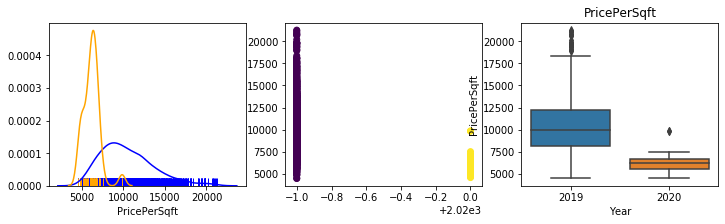

Adyar


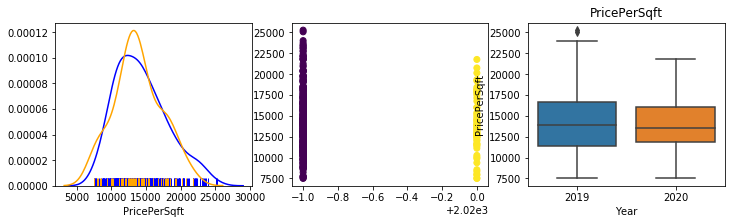

Velachery


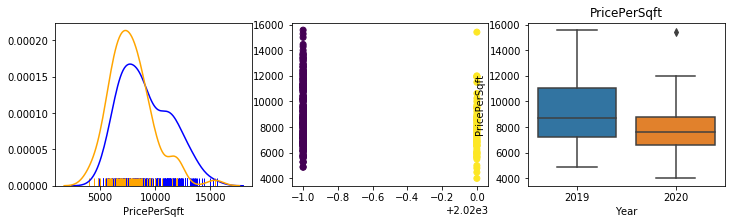

Chromepet


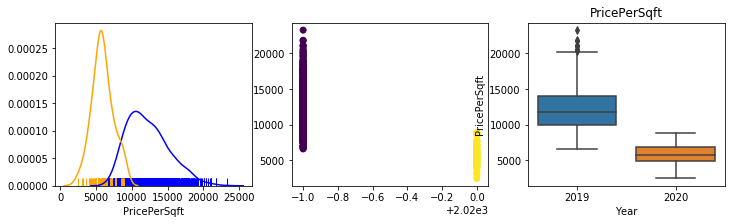

Anna Nagar


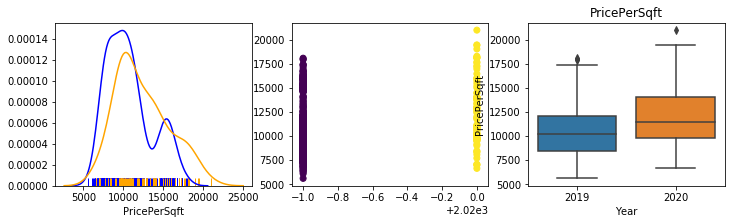

T Nagar


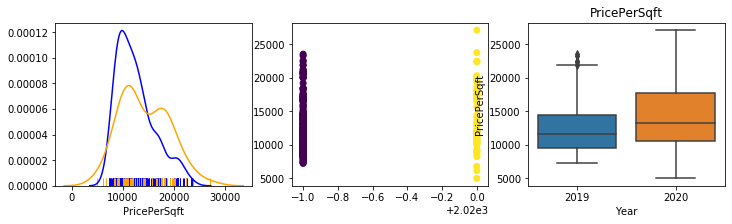

KK Nagar


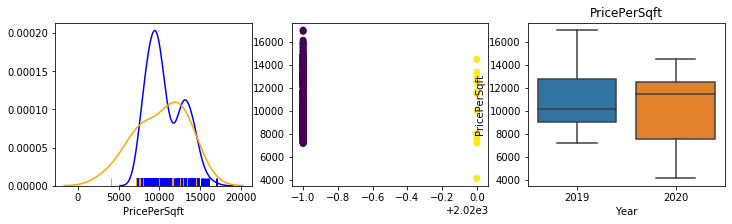

In [22]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            target_0 = df[df[hueVal]==2019]
            target_1 = df[df[hueVal]==2020]
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            ax2.scatter(df[hueVal], df[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

areas = np.array(chennai_2019['Area'].unique())
for area in areas:
    print(area)
    area_2019_data = pd.DataFrame(chennai_2019[chennai_2019['Area']==area].reset_index()['PricePerSqft_2019'])
    area_2019_data.columns = ['PricePerSqft']
    area_2019_data['Year'] = 2019
    area_2020_data = pd.DataFrame(chennai_2020[chennai_2020['Area']==area].reset_index()['PricePerSqft_2020'])
    area_2020_data.columns = ['PricePerSqft']
    area_2020_data['Year'] = 2020
    area_data = pd.concat([area_2019_data, area_2020_data])
    printPairKdeAndBoxPlot(area_data, ['PricePerSqft'], 'Year')

In [23]:
from scipy.stats import ttest_ind

for area in areas:
    data_2019 = chennai_2019[chennai_2019['Area']==area]['PricePerSqft_2019']
    data_2020 = chennai_2020[chennai_2020['Area']==area]['PricePerSqft_2020']

    #Calculate the T-test and P-Value for TWO INDEPENDENTsamples
    tstat, pval = ttest_ind(data_2019, data_2020) 
    if pval < 0.05:
        if tstat < 0:
            state = 'increased'
        else:
            state = 'decreased'
        print(area, state, ':There is a significant difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)
    else:
        print(area, ':There is a significant no difference between prices between 2019 & 2020')
        print('        P Values & T Statistic', pval, tstat)

Karapakkam decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 5.017591503396617e-24 10.337349816348691
Adyar :There is a significant no difference between prices between 2019 & 2020
        P Values & T Statistic 0.3457881696865316 0.9439450683015669
Velachery decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 3.532686786045351e-05 4.191816145734311
Chromepet decreased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 5.95148902043321e-66 18.37377624389224
Anna Nagar increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 5.252647571808504e-07 -5.075006540938224
T Nagar increased :There is a significant difference between prices between 2019 & 2020
        P Values & T Statistic 0.0009352987452625421 -3.3366667148203035
KK Nagar :There is a significant no differen

In [24]:
area_names = []
price_2019=[]
price_2020=[]
result = pd.DataFrame()
for area in areas:
    data_2019 = chennai_2019[chennai_2019['Area']==area]['PricePerSqft_2019']
    data_2020 = chennai_2020[chennai_2020['Area']==area]['PricePerSqft_2020']
    area_names.append(area)
    price_2019.append(data_2019.mean())
    price_2020.append(data_2020.mean())

result['Area'] = area_names
result['price_2019'] = price_2019
result['price_2020'] = price_2020
result['Diff'] = (result['price_2020']-result['price_2019'])/result['price_2019']
result


,Area,price_2019,price_2020,Diff
0,Karapakkam,1e+04,6.2e+03,-0.41
1,Adyar,1.4e+04,1.4e+04,-0.035
2,Velachery,9.1e+03,7.9e+03,-0.14
3,Chromepet,1.2e+04,5.9e+03,-0.52
4,Anna Nagar,1.1e+04,1.2e+04,0.15
5,T Nagar,1.3e+04,1.4e+04,0.14
6,KK Nagar,1.1e+04,1e+04,-0.053
